In [1]:
import pandas as pd
import numpy as np
from scipy import integrate
from numpy import sqrt
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
path_to_data='C:/Users/fadas/ГПО/Сайт/GPO_2022_TimeSeriesForecast/data/Новые данные/Run1/run1_WM32_data.csv'

In [3]:
def get_df(path_to_data):
    df = pd.read_csv(path_to_data, delimiter=';',encoding='utf-8')
    return df

In [4]:
def normal_df(df_col, t):
    #Разбивает содержимое ячейки на два списки "Время" и "Амплитуда" и собирает их в датафрейм
    k=0
    obj_list=[]
    Y_list=[]
    X_list=[]
    str1=str(df_col.values[t])
    obj_list.append(str1)
    for el in obj_list:
        k+=1
        while(el):
            ind=el.find(',')
            string=el[0:ind]
            if(ind == -1):
                string=el
            str1=string.partition(':')
            X_list.append(float(str1[0]))
            Y_list.append(float(str1[2]))
            if(ind!=-1):
                el=el[ind+1:]
            else:
                el=""
    result_df=pd.DataFrame({'Time':X_list,'Amplitude':Y_list})
    return result_df

In [5]:
full_df=get_df(path_to_data)
df=normal_df(full_df['detector_0'], 0)

In [6]:
display(df)

,Time,Amplitude
0,25.8,37.947
1,26.1,-54.259
2,26.2,61.709
3,26.3,-59.867
4,26.5,55.136
5,26.6,-46.648
6,27.1,39.598
7,29.1,47.666
8,29.3,-54.845
9,29.4,52.460


In [7]:
def delete_interference(num_list):
    period=0
    for i in range(1,len(num_list)):
        period = num_list[i]-num_list[i-1]
        if(num_list[i]-num_list[i-1]) < period:
            period = 0
            

In [8]:
def df_for_graphics(df):
    #Находит разрывывы в значениях времени и вставляет нули в эти размеры, соответсвтенно меняя и столбец "Амплитуда"
    time_list=list(df['Time'])
    amplitude_list=list(df['Amplitude'])
    num_list=[]# список для отметки индексов, с которых нужно вставить нули
    for i in range (1, len(time_list)):
        #print(abc[i])
        if  time_list[i]-time_list[i-1]>=0.5:
            num_list.append(i)

    num_list.reverse()
    print(num_list)
    for i in num_list:
        p=i
        k=(time_list[i]-time_list[i-1])/5
        for j in range(5):
            
            time_list.insert(p, time_list[p-1]+k)
            p+=1
            amplitude_list.insert(i, 0)
    print(time_list)
    dataf={"Time": time_list,"Amplitude":amplitude_list}
    df=pd.DataFrame(dataf)
    return df

In [9]:
def df_for_graphics_without0(df):
    #Находит разрывывы в значениях времени и вставляет нули в эти размеры, соответсвтенно меняя и столбец "Амплитуда"
    amplitude_list=list(df['Amplitude'])
    #time_list=[i for i in range(0,len(amplitude_list))]
    time_list=list(df['Time'])
    dataf={"Time": time_list,"Amplitude":amplitude_list}
    df=pd.DataFrame(dataf)
    return df

In [10]:
df1=df_for_graphics(df)
df1.head()

[30, 29, 27, 26, 21, 19, 15, 12, 7, 6]
[25.8, 26.1, 26.2, 26.3, 26.5, 26.6, 26.700000000000003, 26.800000000000004, 26.900000000000006, 27.000000000000007, 27.10000000000001, 27.1, 27.5, 27.9, 28.299999999999997, 28.699999999999996, 29.099999999999994, 29.1, 29.3, 29.4, 29.5, 29.7, 29.84, 29.98, 30.12, 30.26, 30.400000000000002, 30.4, 30.5, 30.7, 31.0, 31.3, 31.6, 31.900000000000002, 32.2, 32.2, 32.3, 32.5, 32.6, 32.78, 32.96, 33.14, 33.32, 33.5, 33.5, 33.7, 33.92, 34.14, 34.36, 34.58, 34.8, 34.8, 34.9, 35.2, 35.3, 35.5, 35.62, 35.739999999999995, 35.85999999999999, 35.97999999999999, 36.09999999999999, 36.1, 36.54, 36.98, 37.419999999999995, 37.85999999999999, 38.29999999999999, 38.3, 38.4, 38.54, 38.68, 38.82, 38.96, 39.1, 39.1, 39.58, 40.059999999999995, 40.53999999999999, 41.01999999999999, 41.499999999999986, 41.5]


,Time,Amplitude
0,25.8,37.947
1,26.1,-54.259
2,26.2,61.709
3,26.3,-59.867
4,26.5,55.136


In [11]:
def draw_Graphic(df, title):
    plt.figure(figsize=(30, 20))
    plt.plot(df['Time'],df['Amplitude'], color='r', linewidth=3)
    plt.rc('xtick', labelsize=22)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=22) 
    #plt.xlim(0,50)
    plt.grid(color='k')
    plt.minorticks_on()
    plt.grid(which='minor', 
            color = 'k', 
            linestyle = ':')
    plt.xlabel('Time', fontsize=24)
    plt.ylabel('Amplitude', fontsize=24)
    plt.title(title, fontsize=28)


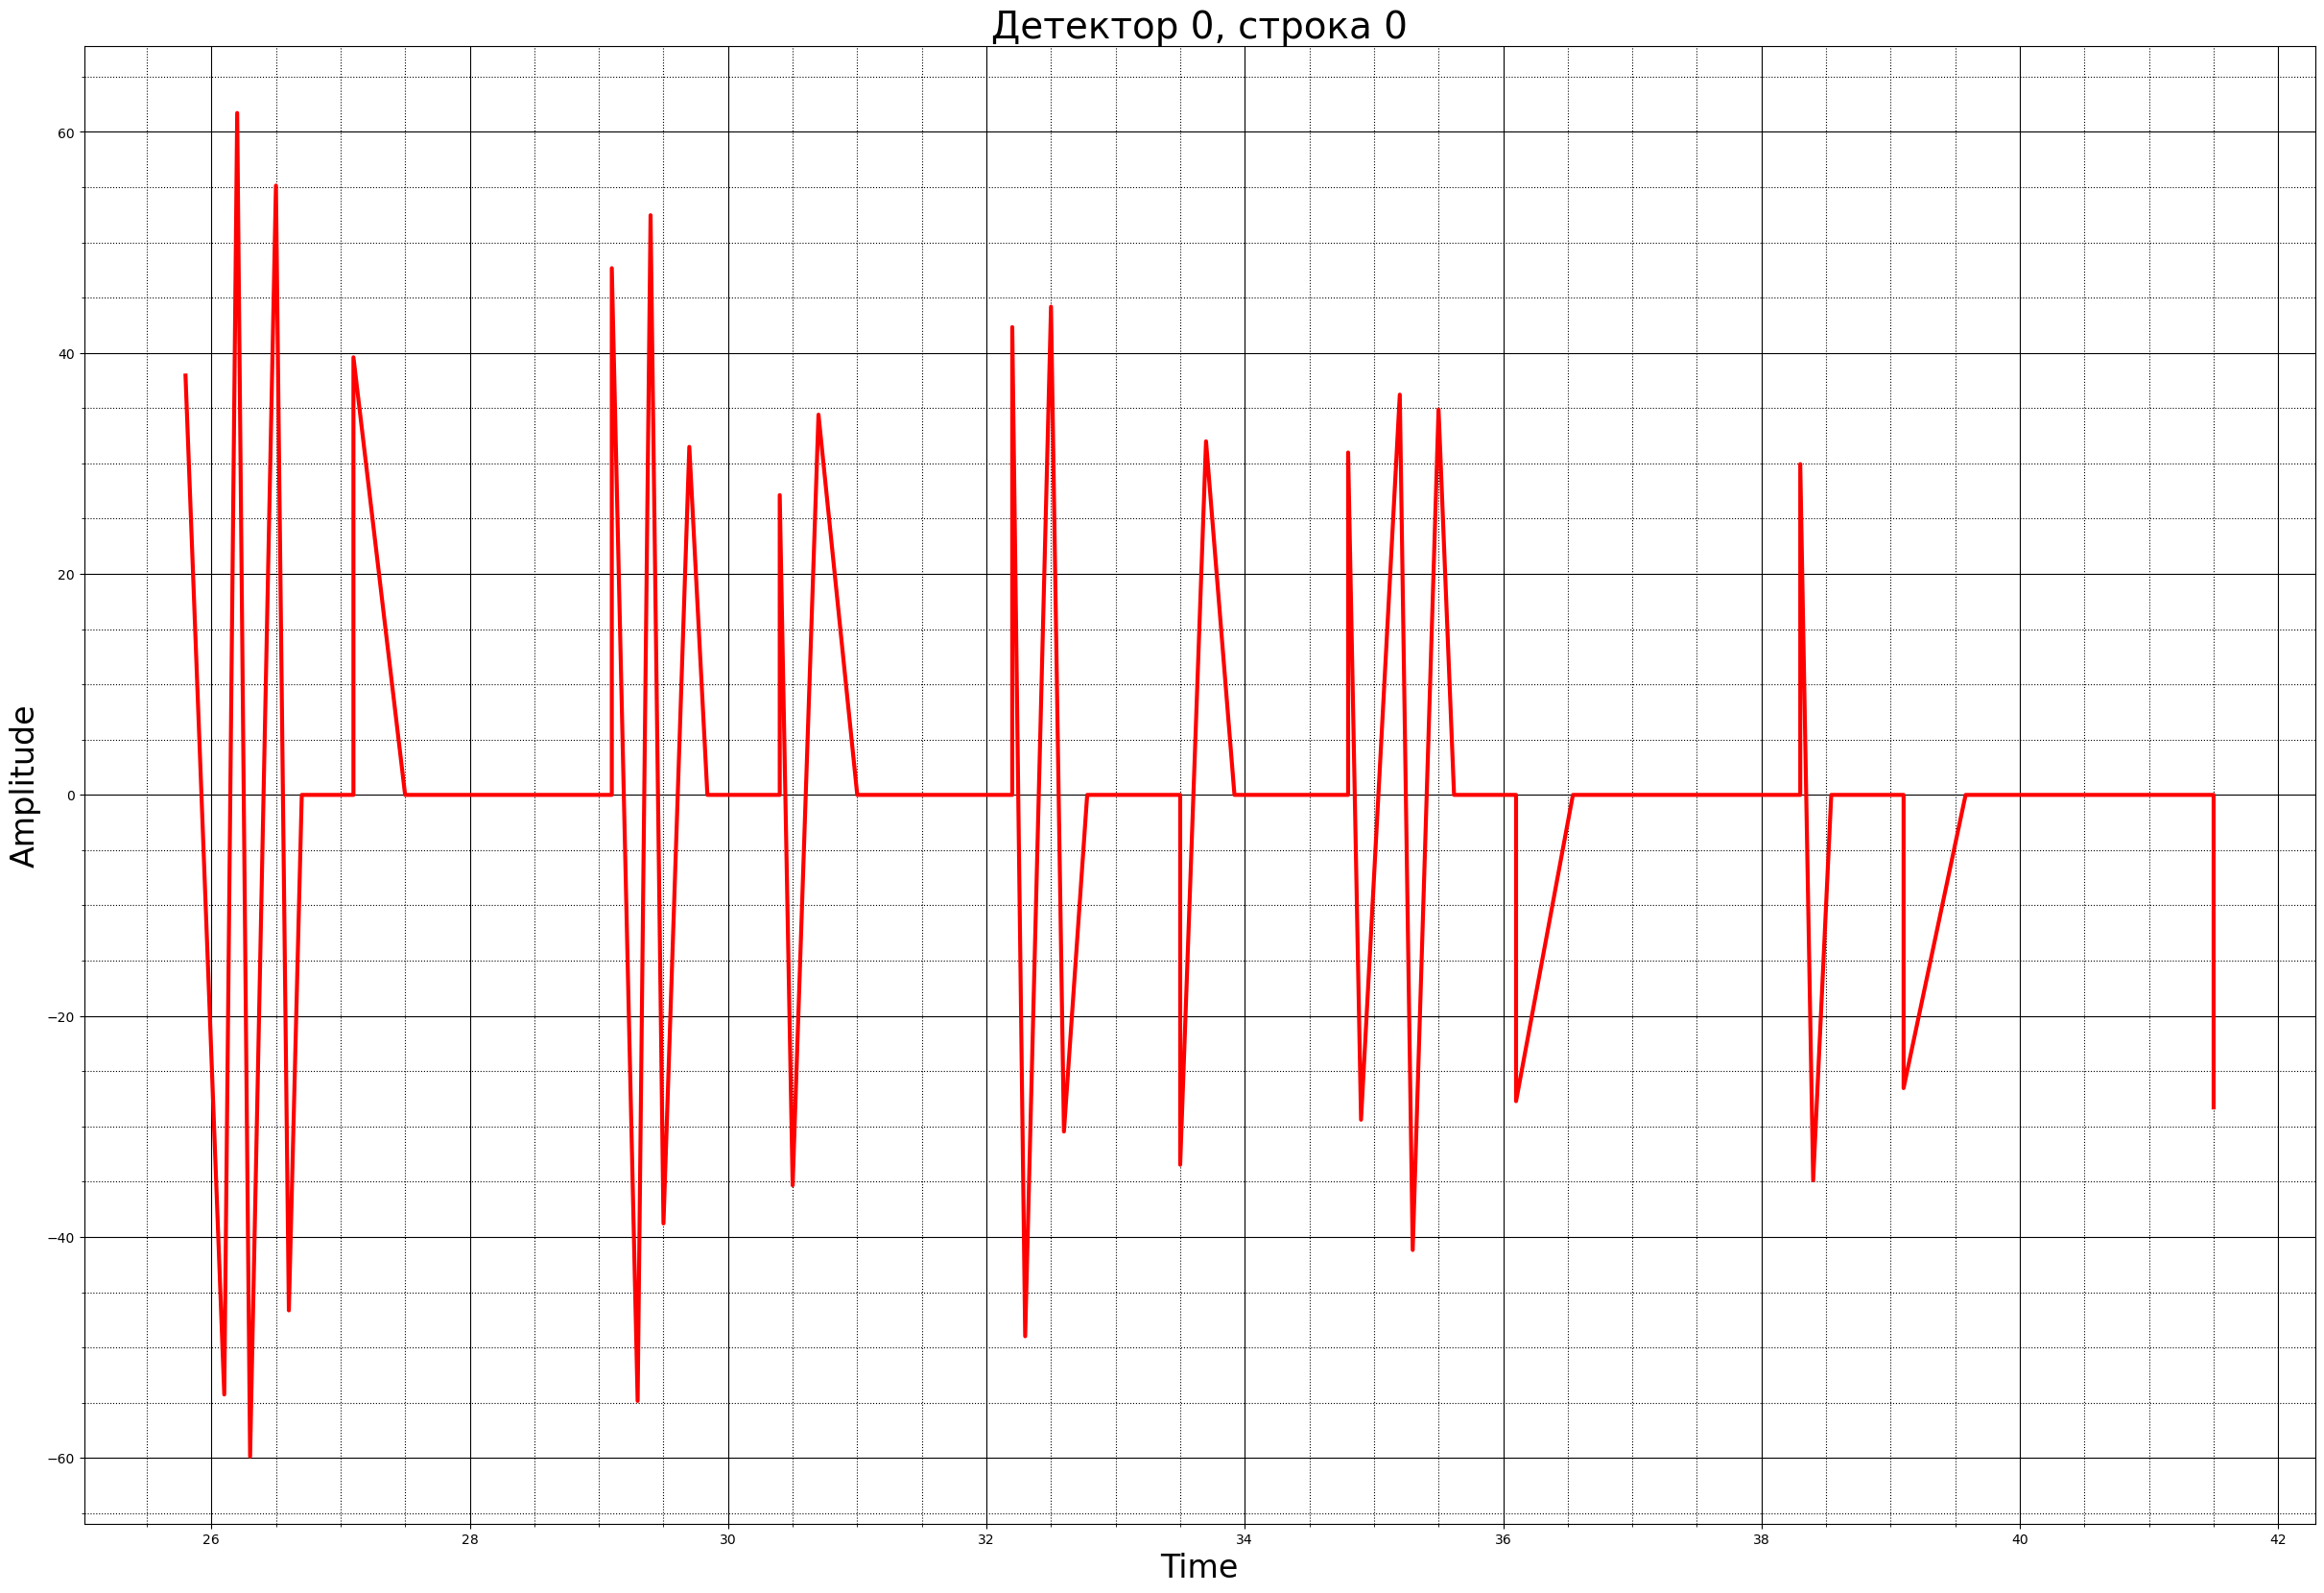

In [12]:
draw_Graphic(df1, 'Детектор 0, строка 0')

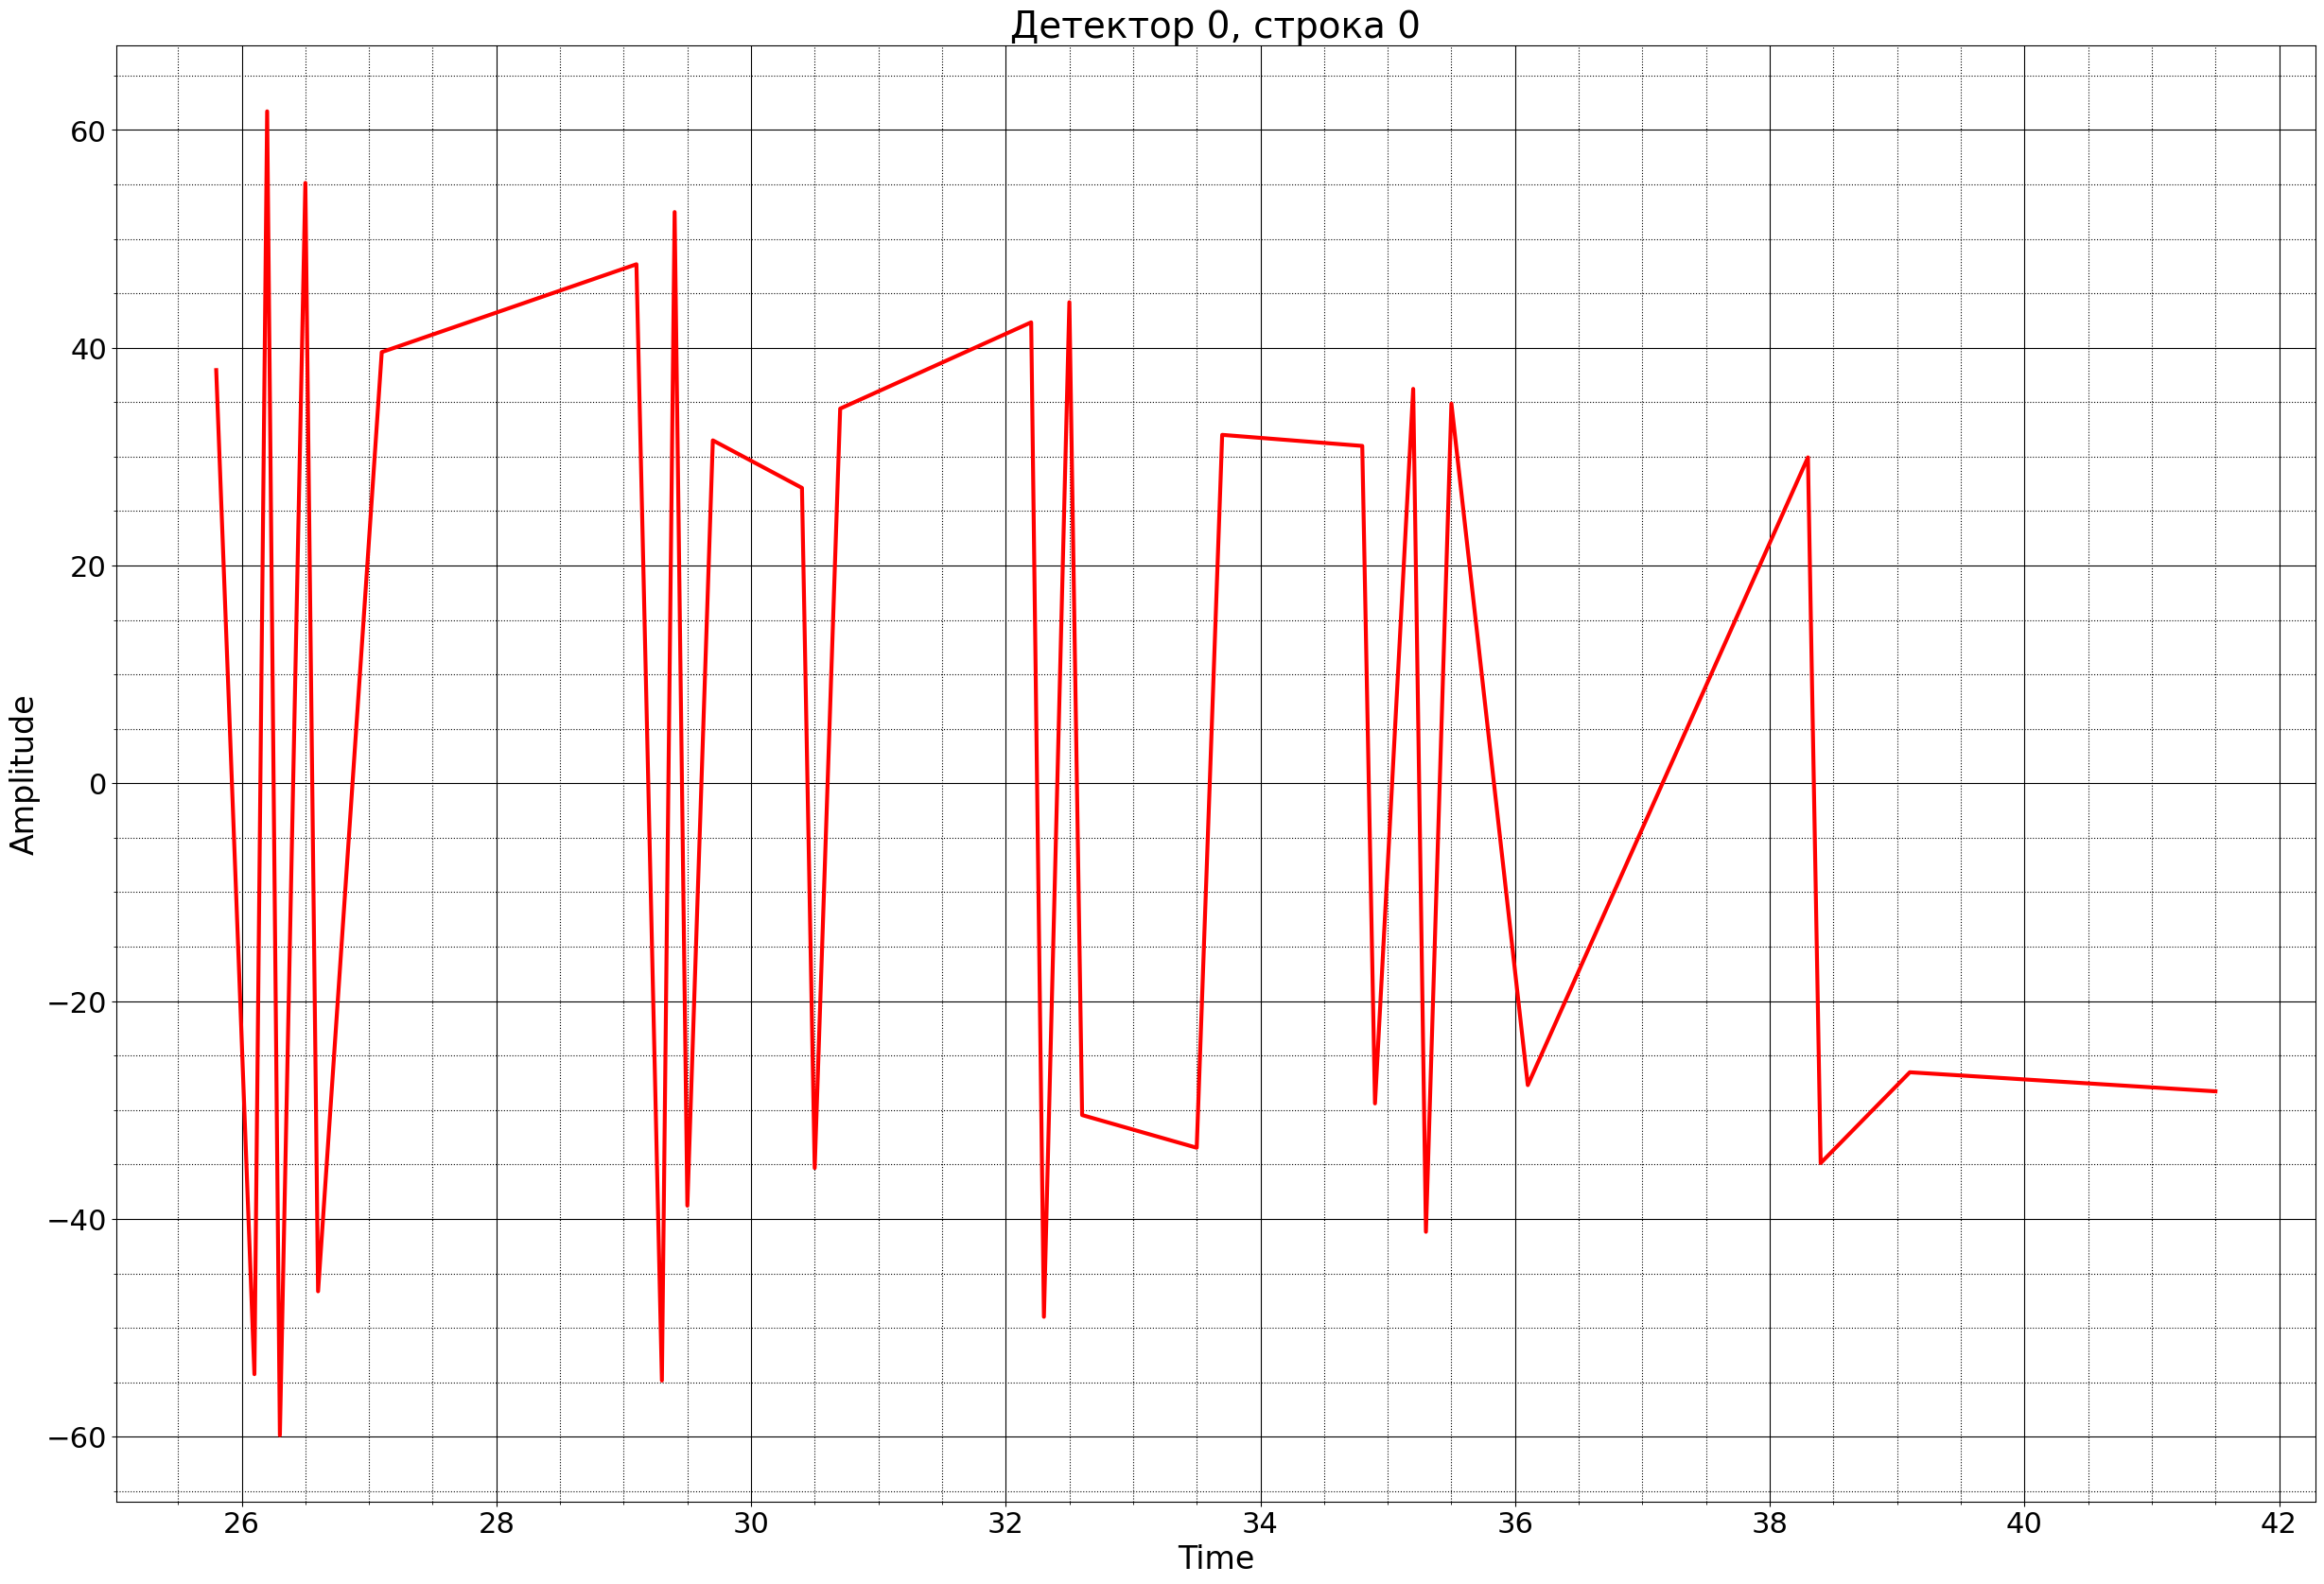

In [13]:
df2=df_for_graphics_without0(df)
draw_Graphic(df2, 'Детектор 0, строка 0' )

[30, 28, 25, 21, 19, 15, 13, 8]
[25.5, 25.7, 25.8, 25.9, 26.1, 26.2, 26.3, 26.5, 26.94, 27.380000000000003, 27.820000000000004, 28.260000000000005, 28.700000000000006, 28.7, 28.7, 28.9, 29.0, 29.1, 29.28, 29.46, 29.64, 29.82, 30.0, 30.0, 30.1, 30.400000000000002, 30.700000000000003, 31.000000000000004, 31.300000000000004, 31.600000000000005, 31.6, 31.7, 31.9, 32.0, 32.2, 32.400000000000006, 32.60000000000001, 32.80000000000001, 33.000000000000014, 33.0, 33.1, 33.42, 33.74, 34.06, 34.38, 34.7, 34.7, 34.8, 34.9, 35.0, 35.54, 36.08, 36.62, 37.16, 37.699999999999996, 37.7, 37.8, 37.9, 38.5, 39.1, 39.7, 40.300000000000004, 40.900000000000006, 40.9, 41.0, 41.6, 42.2, 42.800000000000004, 43.400000000000006, 44.00000000000001, 44.0]


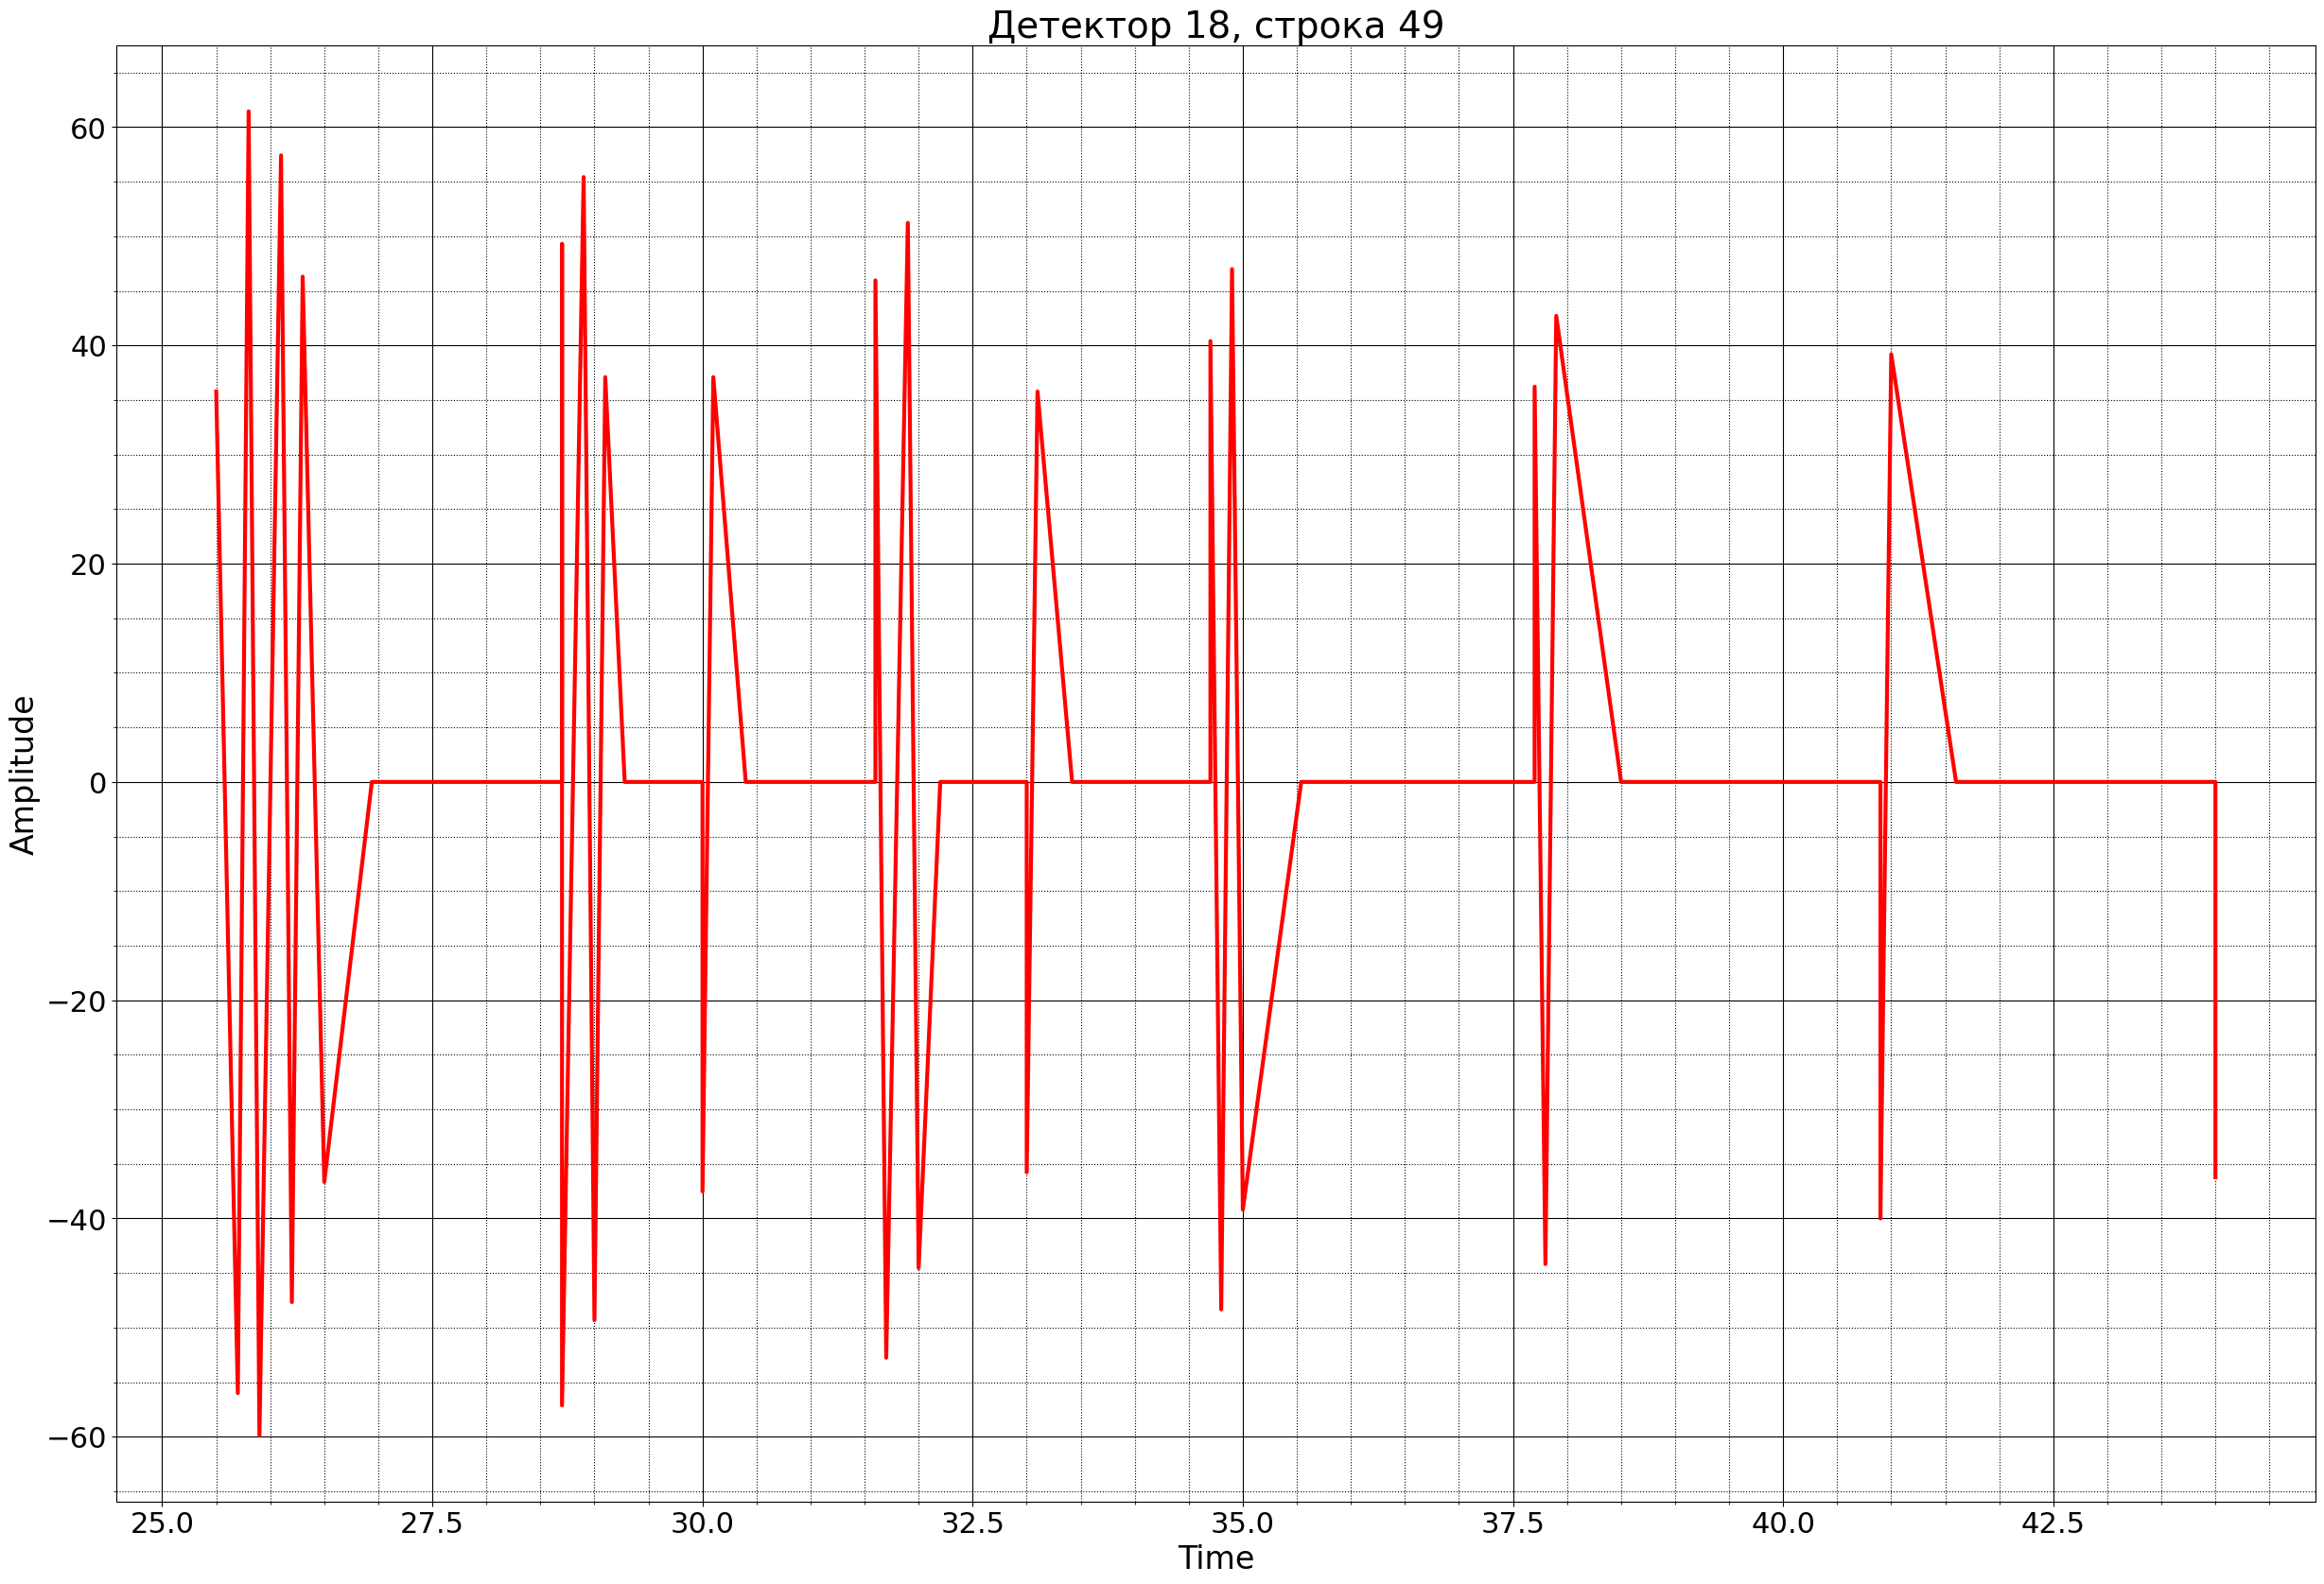

In [14]:
df=normal_df(full_df['detector_18'], 49)
df=df_for_graphics(df)
draw_Graphic(df,'Детектор 18, строка 49')

In [15]:
df=normal_df(full_df['detector_1'], 13)
display(df)

,Time,Amplitude
0,25.1,30.984
1,25.3,-36.661
2,25.4,42.332
3,25.6,-56.285
4,25.7,61.188
5,25.8,-58.515
6,25.9,51.846
7,26.1,-45.957
8,26.2,42.332
9,28.5,44.542


[29, 28, 22, 20, 16, 14, 9]
[25.1, 25.3, 25.4, 25.6, 25.7, 25.8, 25.9, 26.1, 26.2, 26.66, 27.12, 27.580000000000002, 28.040000000000003, 28.500000000000004, 28.5, 28.6, 28.7, 28.9, 29.0, 29.18, 29.36, 29.54, 29.72, 29.9, 29.9, 30.0, 30.3, 30.6, 30.900000000000002, 31.200000000000003, 31.500000000000004, 31.5, 31.6, 31.7, 31.8, 32.0, 32.2, 32.400000000000006, 32.60000000000001, 32.80000000000001, 32.8, 32.9, 33.14, 33.38, 33.620000000000005, 33.86000000000001, 34.10000000000001, 34.1, 34.2, 34.4, 34.5, 34.7, 34.8, 35.019999999999996, 35.239999999999995, 35.459999999999994, 35.67999999999999, 35.89999999999999, 35.9, 36.22, 36.54, 36.86, 37.18, 37.5, 37.5, 37.6]


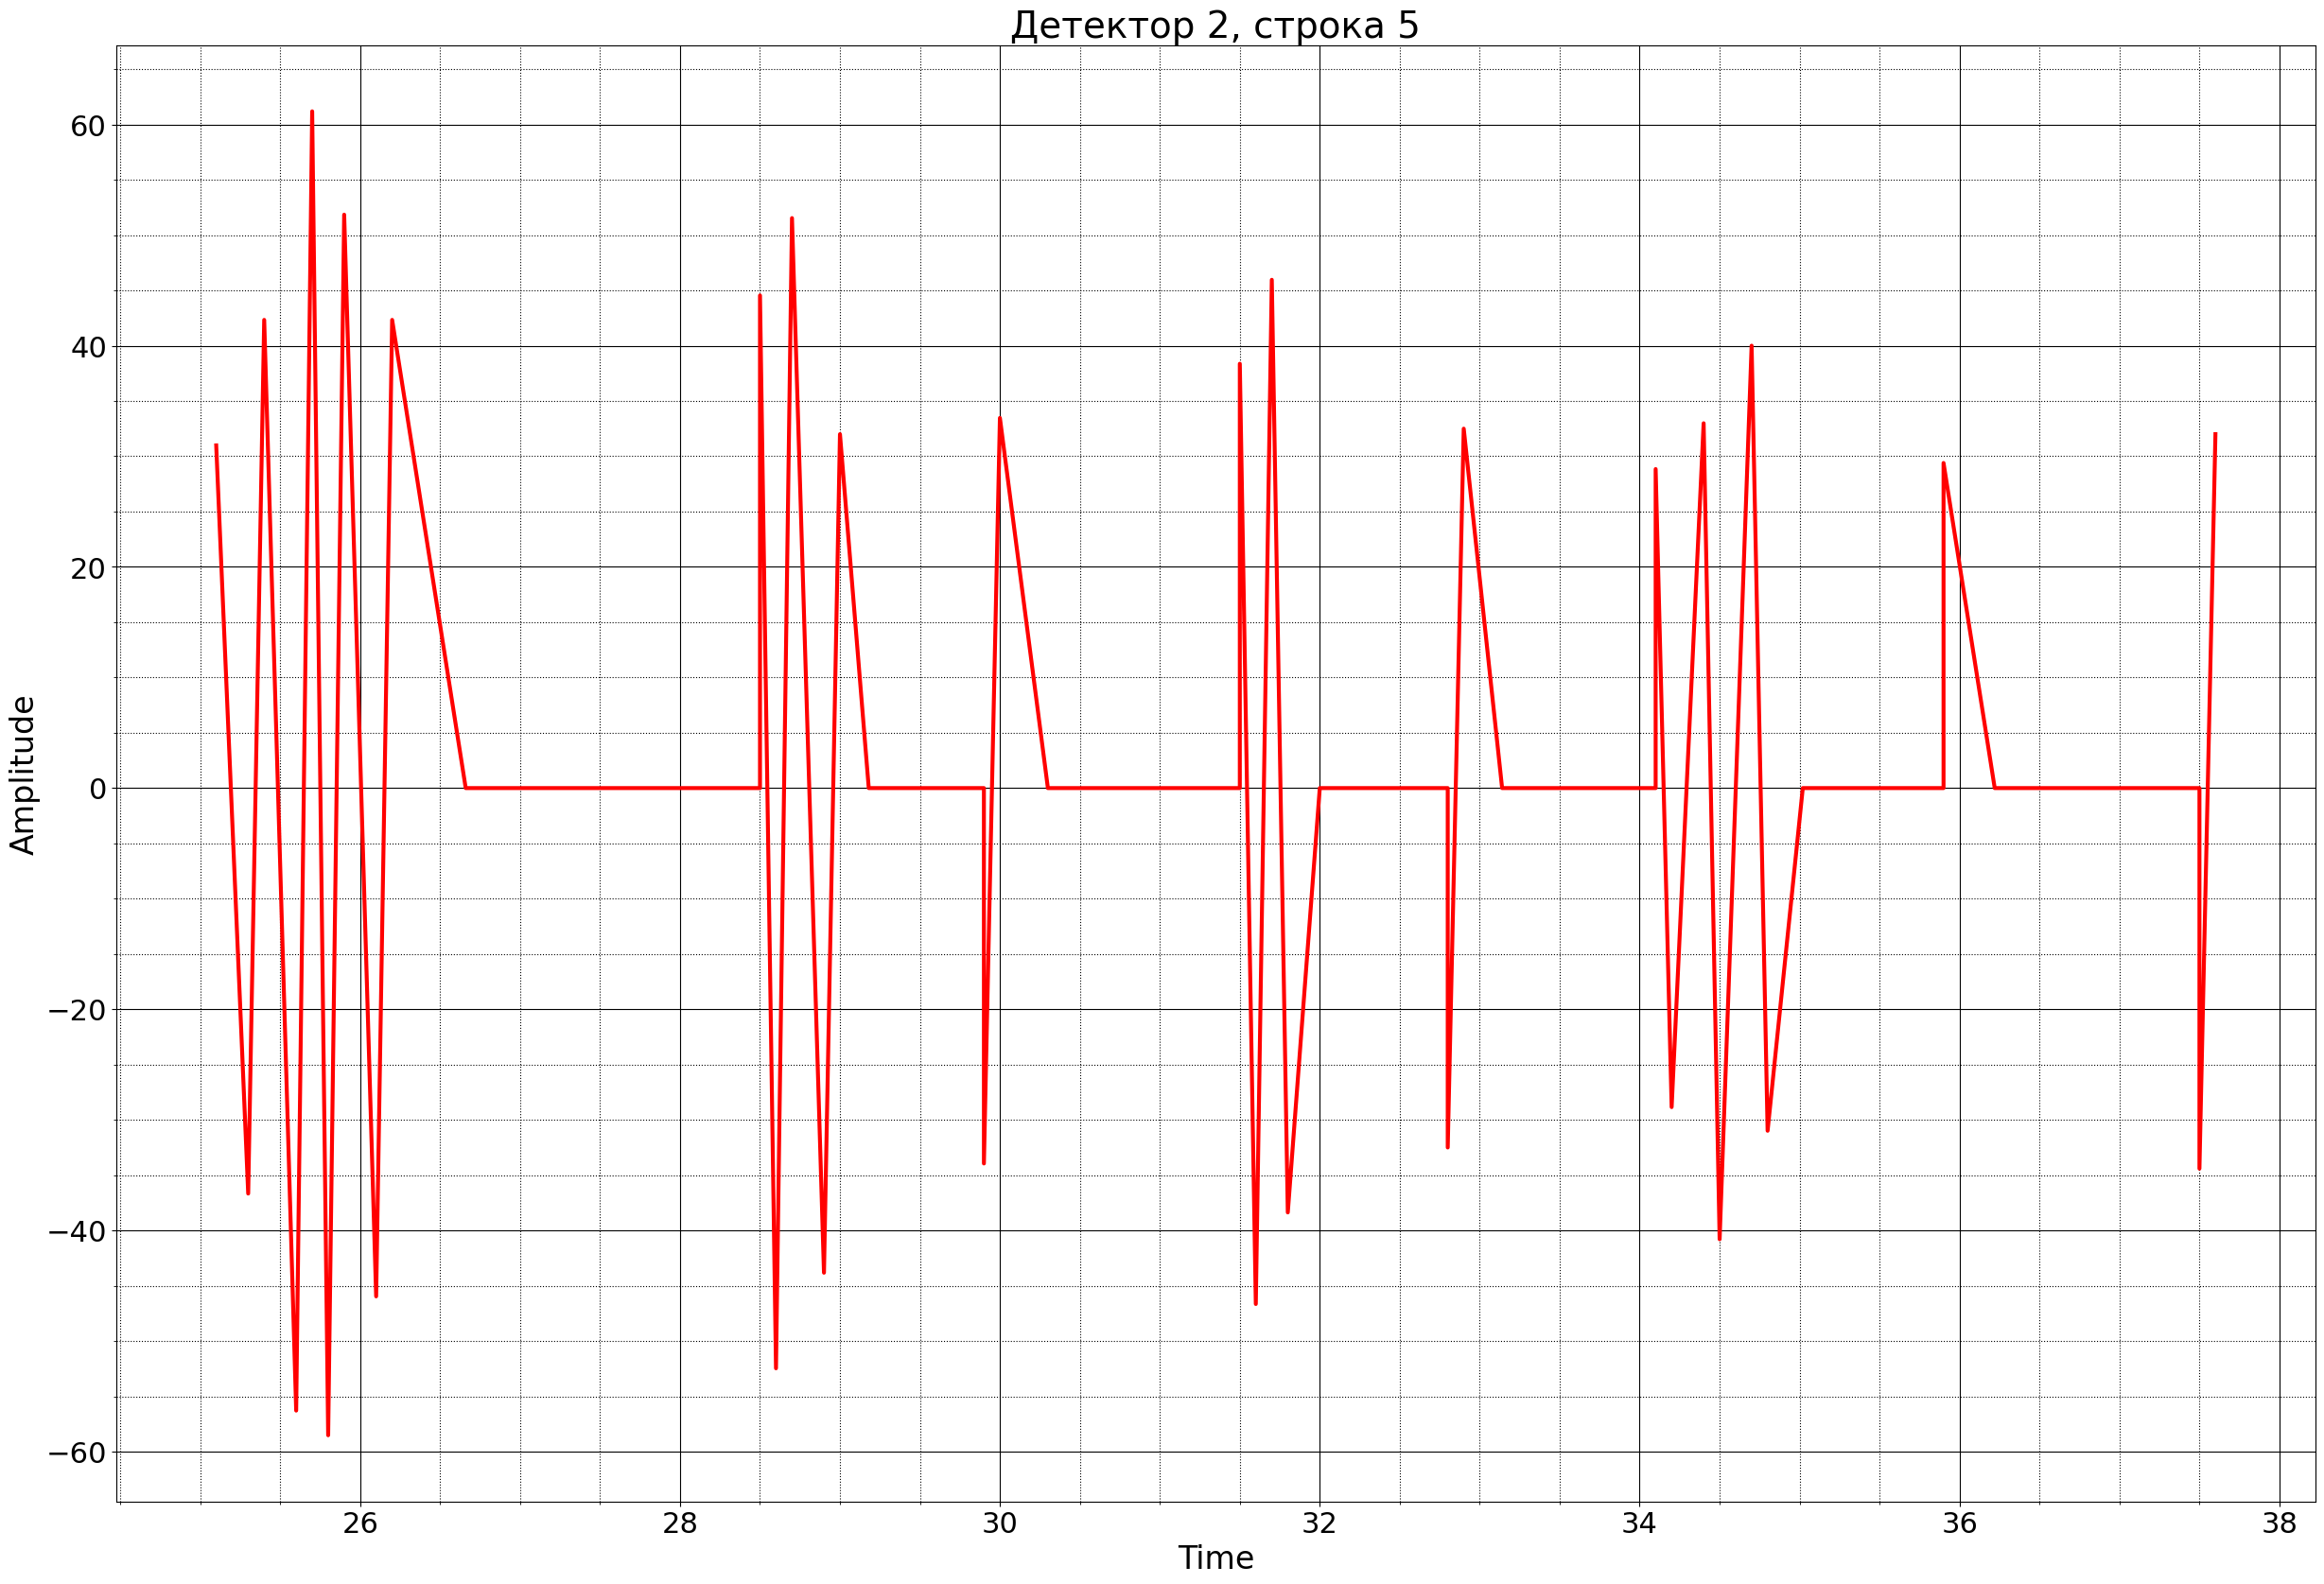

In [16]:
df=df_for_graphics(df)
draw_Graphic(df,'Детектор 2, строка 5')

In [17]:
def integral(full_df, column, row):
    df=normal_df(full_df[column], row)
    result = integrate.trapezoid(df['Amplitude'],df['Time'])
    return result

# Интегралы для бездефектных ячеек 

In [18]:
row_list=[13, 54, 103]
intgr_list=[]
columns=full_df.columns.tolist()
detector_list=columns[3:9]
for row in row_list:
    for column in detector_list:
        #print(row, column)
        intgr_list.append(integral(full_df, column, row))
    avg=sum(intgr_list)/len(intgr_list)
    print(avg)

158.980075
153.75163750000004
126.13605555555561


# Интегралы для дефектных ячеек 

In [19]:
row_list=[23, 25]
columns=full_df.columns.tolist()
intgr_list=[]
detector_list=columns[14:19]
for row in row_list:
    for column in detector_list:
        #print(row, column)
         intgr_list.append(integral(full_df, column, row))
avg=sum(intgr_list)/len(intgr_list)
print(avg)

7.670489999999985


In [20]:
row_list=[68, 70]

columns=full_df.columns.tolist()
detector_list=columns[11:15]
for row in row_list:
    for column in detector_list:
       # print(row, column)
         intgr_list.append(integral(full_df, column, row))
avg=sum(intgr_list)/len(intgr_list)
print(avg)

39.26630555555559


In [21]:
print(integrate.trapezoid([12, 4, -1,5, -8,22],[-5, -3, 1,4, 8,12]))
print(integrate.trapezoid([11.9996,11.9997,11.9998,11.9999,12, 4, -1,5, -8,22],[-5.0004,-5.0003,-5.0002,-5.0001,-5, -3, 1,4, 8,12]))

50.0
50.004799919999996
